1 - Cargar librerias

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

2- Cargar archivo excel

In [28]:
path_file = "BBDD_Hospitalización.xlsx"
df = pd.read_excel(path_file,sheet_name='Datos')

c:\Users\Frank y Cami\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3- eliminar columnas irrelevantes

In [29]:
df = df.drop(columns=["DIAS HOSPITALIZACION MQ", "DIAS HOSPITALIZACIÓN UPC"],errors='ignore')

In [30]:
df.head(3)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI


4- Crear cun countplot de Y

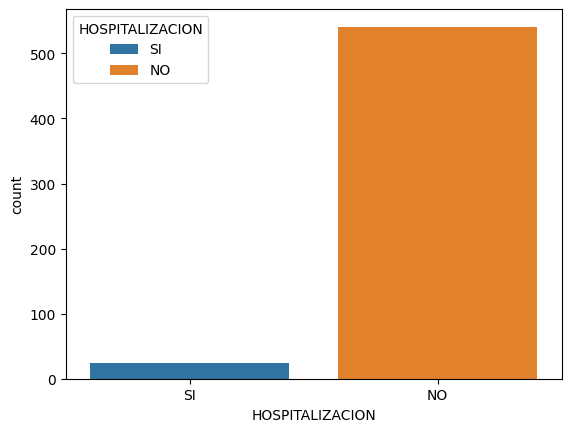

In [40]:
sns.countplot(x = df['HOSPITALIZACION'],hue =df['HOSPITALIZACION'])
plt.show()

5- Manejar valores nulos llenando con la mediana de cada columna numérica

In [41]:

for col in ["EDAD", "PSA", "NUMERO DE MUESTRAS TOMADAS"]:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Frank y Cami\AppData\Local\Temp\ipykernel_12156\1147055342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Frank y Cami\AppData\Local\Temp\ipykernel_12156\1147055342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [42]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO
568,64.0,NaN,NaN,8.00,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6- Convertir variables categóricas en numéricas

In [43]:

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

7- Separar variables predictoras (X) y objetivo (y)

In [44]:
X = df.drop(columns=['HOSPITALIZACION'],errors='ignore')
y = df['HOSPITALIZACION']

8- Dividir los datos en entrenamiento (80%) y prueba (20%)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(456, 17) (114, 17) (456,) (114,)


9- Entrenar un modelo Random Forest

In [49]:
modelRF = RandomForestClassifier(n_estimators=100,random_state=42)

In [50]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

10- Evaluar el modelo 

In [59]:
y_pred = modelRF.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)



c:\Users\Frank y Cami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Frank y Cami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Frank y Cami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [60]:
print(f"Precisión del modelo: {accuracy:.4f}")
print("Reporte de clasificación:\n", report)

Precisión del modelo: 0.9912
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         1

    accuracy                           0.99       114
   macro avg       0.66      0.67      0.67       114
weighted avg       0.98      0.99      0.99       114



11- Aqui voy a crear un Dataset con la libreria Random para probar el modelo

In [ ]:
import random

# Generar un paciente aleatorio con valores dentro de rangos lógicos
nuevo_paciente = {
    "EDAD": random.randint(50, 80),  # Edad entre 50 y 80 años
    "DIABETES": random.choice([0, 1]),  # 0 = No, 1 = Sí
    "HOSPITALIZACIÓN ULTIMO MES": random.choice([0, 1]),
    "PSA": round(random.uniform(2.0, 30.0), 1),  # Valores PSA entre 2 y 30
    "BIOPSIAS PREVIAS": random.choice([0, 1]),
    "VOLUMEN PROSTATICO": random.choice([1, 2]),  # Suposición: puede tomar valores 1 o 2
    "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": random.choice([0, 1]),
    "NUMERO DE MUESTRAS TOMADAS": random.choice([12, 24]),  # Basado en los datos que pasaste
    "CUP": random.choice([0, 1]),  # Asumiendo que puede ser binario
    "ENF. CRONICA PULMONAR OBSTRUCTIVA": random.choice([0, 1]),
    "BIOPSIA": random.choice([0, 1]),
    "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA": random.randint(5, 15),
    "FIEBRE": random.choice([0, 1]),
    "ITU": random.choice([0, 1]),
    "TIPO DE CULTIVO": random.randint(0, 2),  # Suposición de valores categóricos
    "AGENTE AISLADO": random.randint(0, 2),  # Suposición de valores categóricos
    "PATRON DE RESISTENCIA": random.randint(0, 2),  # Suposición de valores categóricos
}

# Convertir a DataFrame
nuevo_paciente_df = pd.DataFrame([nuevo_paciente])

# Asegurar transformación de variables categóricas como en el modelo
for col, le in label_encoders.items():
    if col in nuevo_paciente_df:
        nuevo_paciente_df[col] = le.transform(nuevo_paciente_df[col].astype(str))



12- Aqui pruebo mi modelo con caracteristicas unicas y basado en los valores random me indicara si requiero o no hospitalizacion 


prediccion = model.predict(nuevo_paciente_df)
print("Paciente generado:", nuevo_paciente)
print("Predicción de hospitalización:", "Sí" if prediccion[0] == 1 else "No")